In [2]:
import numpy as np
import pandas as pd

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("train.csv")

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [11]:
df.duplicated().sum()

0

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1168, 80)
X_test shape: (292, 80)
y_train shape: (1168,)
y_test shape: (292,)


In [15]:
test_df = pd.read_csv('test.csv')
test_df.shape

(1459, 80)

In [16]:
with open('data_description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

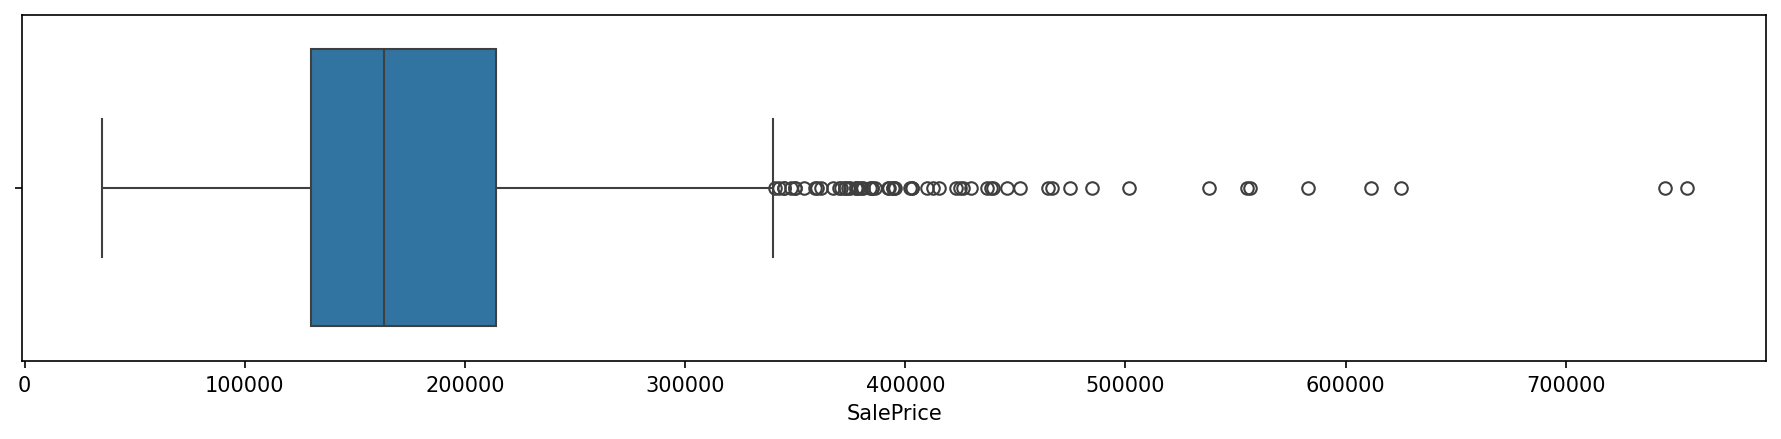

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 3), dpi=150)
sns.boxplot(x=df['SalePrice'])
plt.xlabel('SalePrice')
plt.show()

In [18]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal


In [19]:
X_train.shape

(1168, 80)

In [20]:
X_train.dtypes.value_counts()

object     43
int64      34
float64     3
Name: count, dtype: int64

In [21]:
X_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1168.000000,1168.000000,951.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,730.904966,56.849315,70.343849,10689.642123,6.121575,5.584760,1970.965753,1984.897260,103.771945,446.023973,...,476.273973,95.946918,49.578767,21.839041,3.812500,15.407534,2.955479,51.267123,6.356164,2007.818493
std,425.369088,42.531862,24.897021,10759.366198,1.367619,1.116062,30.675495,20.733955,173.032238,459.070977,...,211.095373,129.685939,69.433580,62.083227,31.519664,55.881148,41.648504,553.039684,2.670707,1.322639
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,360.750000,20.000000,59.000000,7587.250000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,732.500000,50.000000,70.000000,9600.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,384.500000,...,482.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1101.750000,70.000000,80.000000,11700.000000,7.000000,6.000000,2001.000000,2004.000000,166.000000,721.000000,...,576.000000,168.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [22]:
X_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      217
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

In [23]:
missing_values = X_train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percentage = (missing_values / len(X_train)) * 100
print(missing_percentage)

LotFrontage     18.578767
Alley           93.664384
MasVnrType      58.476027
MasVnrArea       0.513699
BsmtQual         2.397260
BsmtCond         2.397260
BsmtExposure     2.397260
BsmtFinType1     2.397260
BsmtFinType2     2.397260
Electrical       0.085616
FireplaceQu     46.832192
GarageType       5.479452
GarageYrBlt      5.479452
GarageFinish     5.479452
GarageQual       5.479452
GarageCond       5.479452
PoolQC          99.486301
Fence           80.051370
MiscFeature     96.061644
dtype: float64


In [24]:
columns_to_drop = missing_percentage[missing_percentage > 30].index
X_train.drop(columns=columns_to_drop, inplace=True)
print(X_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
254    255          20       RL         70.0     8400   Pave      Reg   
1066  1067          60       RL         59.0     7837   Pave      IR1   
638    639          30       RL         67.0     8777   Pave      Reg   
799    800          50       RL         60.0     7200   Pave      Reg   
380    381          50       RL         50.0     5000   Pave      Reg   
...    ...         ...      ...          ...      ...    ...      ...   
1095  1096          20       RL         78.0     9317   Pave      IR1   
1130  1131          50       RL         65.0     7804   Pave      Reg   
1294  1295          20       RL         60.0     8172   Pave      Reg   
860    861          50       RL         55.0     7642   Pave      Reg   
1126  1127         120       RL         53.0     3684   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
254          Lvl    AllPub    Inside  ... 

In [25]:
columns_to_fill = missing_percentage[missing_percentage < 30].index
columns_to_fill

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [26]:
for column in columns_to_fill:
    if X_train[column].dtype == "float64" or X_train[column].dtype == "int64":
        X_train[column].fillna(X_train[column].mean(), inplace=True)
    else:

        X_train[column].fillna(X_train[column].mode()[0], inplace=True)
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,IR1,Lvl,AllPub,Inside,...,40,0,0,0,0,0,5,2009,WD,Normal
638,639,30,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,...,0,164,0,0,0,0,5,2008,WD,Normal
799,800,50,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Corner,...,0,264,0,0,0,0,6,2007,WD,Normal
380,381,50,RL,50.0,5000,Pave,Reg,Lvl,AllPub,Inside,...,0,242,0,0,0,0,5,2010,WD,Normal


In [27]:
X_train.isnull().sum().sum()

0

In [28]:
X_train.Id.nunique()

1168

In [29]:
X_train.drop(columns=['Id'], inplace=True)

In [30]:
num_data = X_train.select_dtypes(include=np.number).columns.tolist()

In [31]:
cat_data = X_train.select_dtypes(exclude=np.number).columns.tolist()

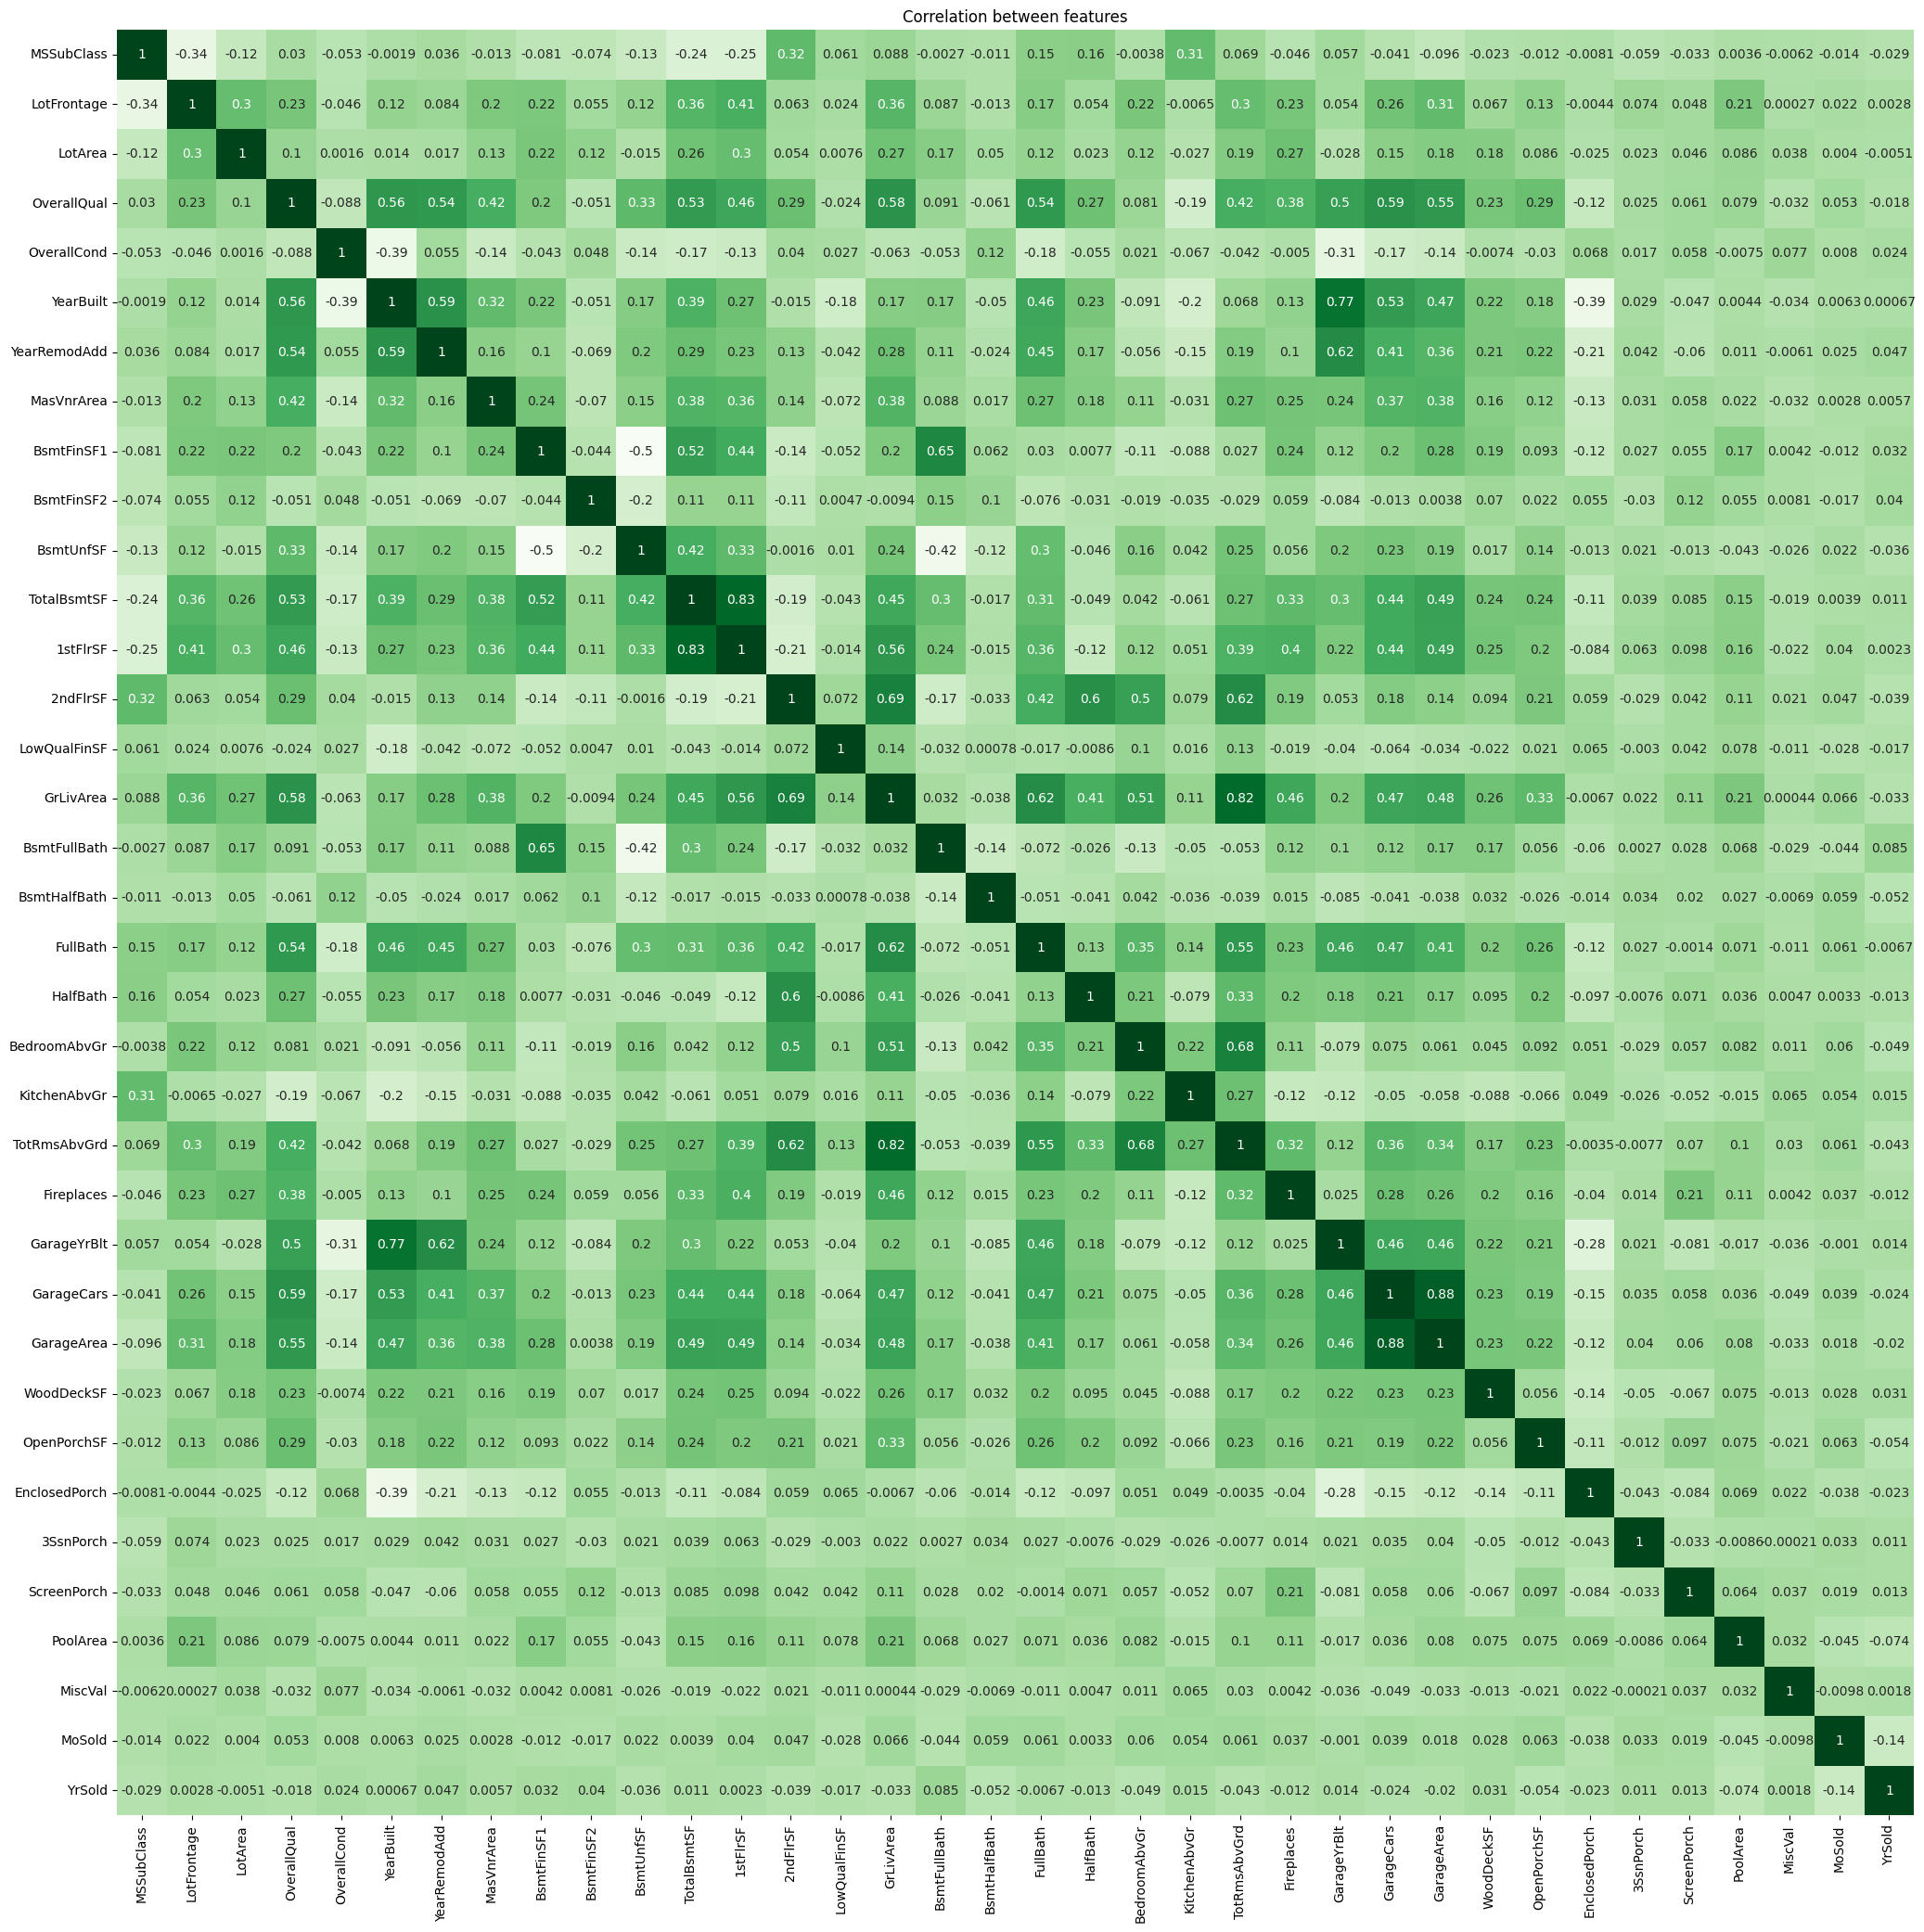

In [32]:
corr = X_train[num_data].corr()
plt.subplots(1,1, figsize=(25,25))
sns.heatmap(data=corr, cmap ='Greens', annot = corr, cbar=None)
plt.title('Correlation between features')
plt.show()

In [33]:
num_data.remove('GarageArea')

In [34]:
num_data.remove('1stFlrSF')

In [35]:
num_data.remove('GrLivArea')

In [36]:
num_data.remove('BsmtFullBath')

In [37]:
num_data.remove('FullBath')

In [39]:
num_data.remove('HalfBath')

In [38]:
num_data.remove('TotRmsAbvGrd')

In [40]:
num_data.remove('GarageYrBlt')

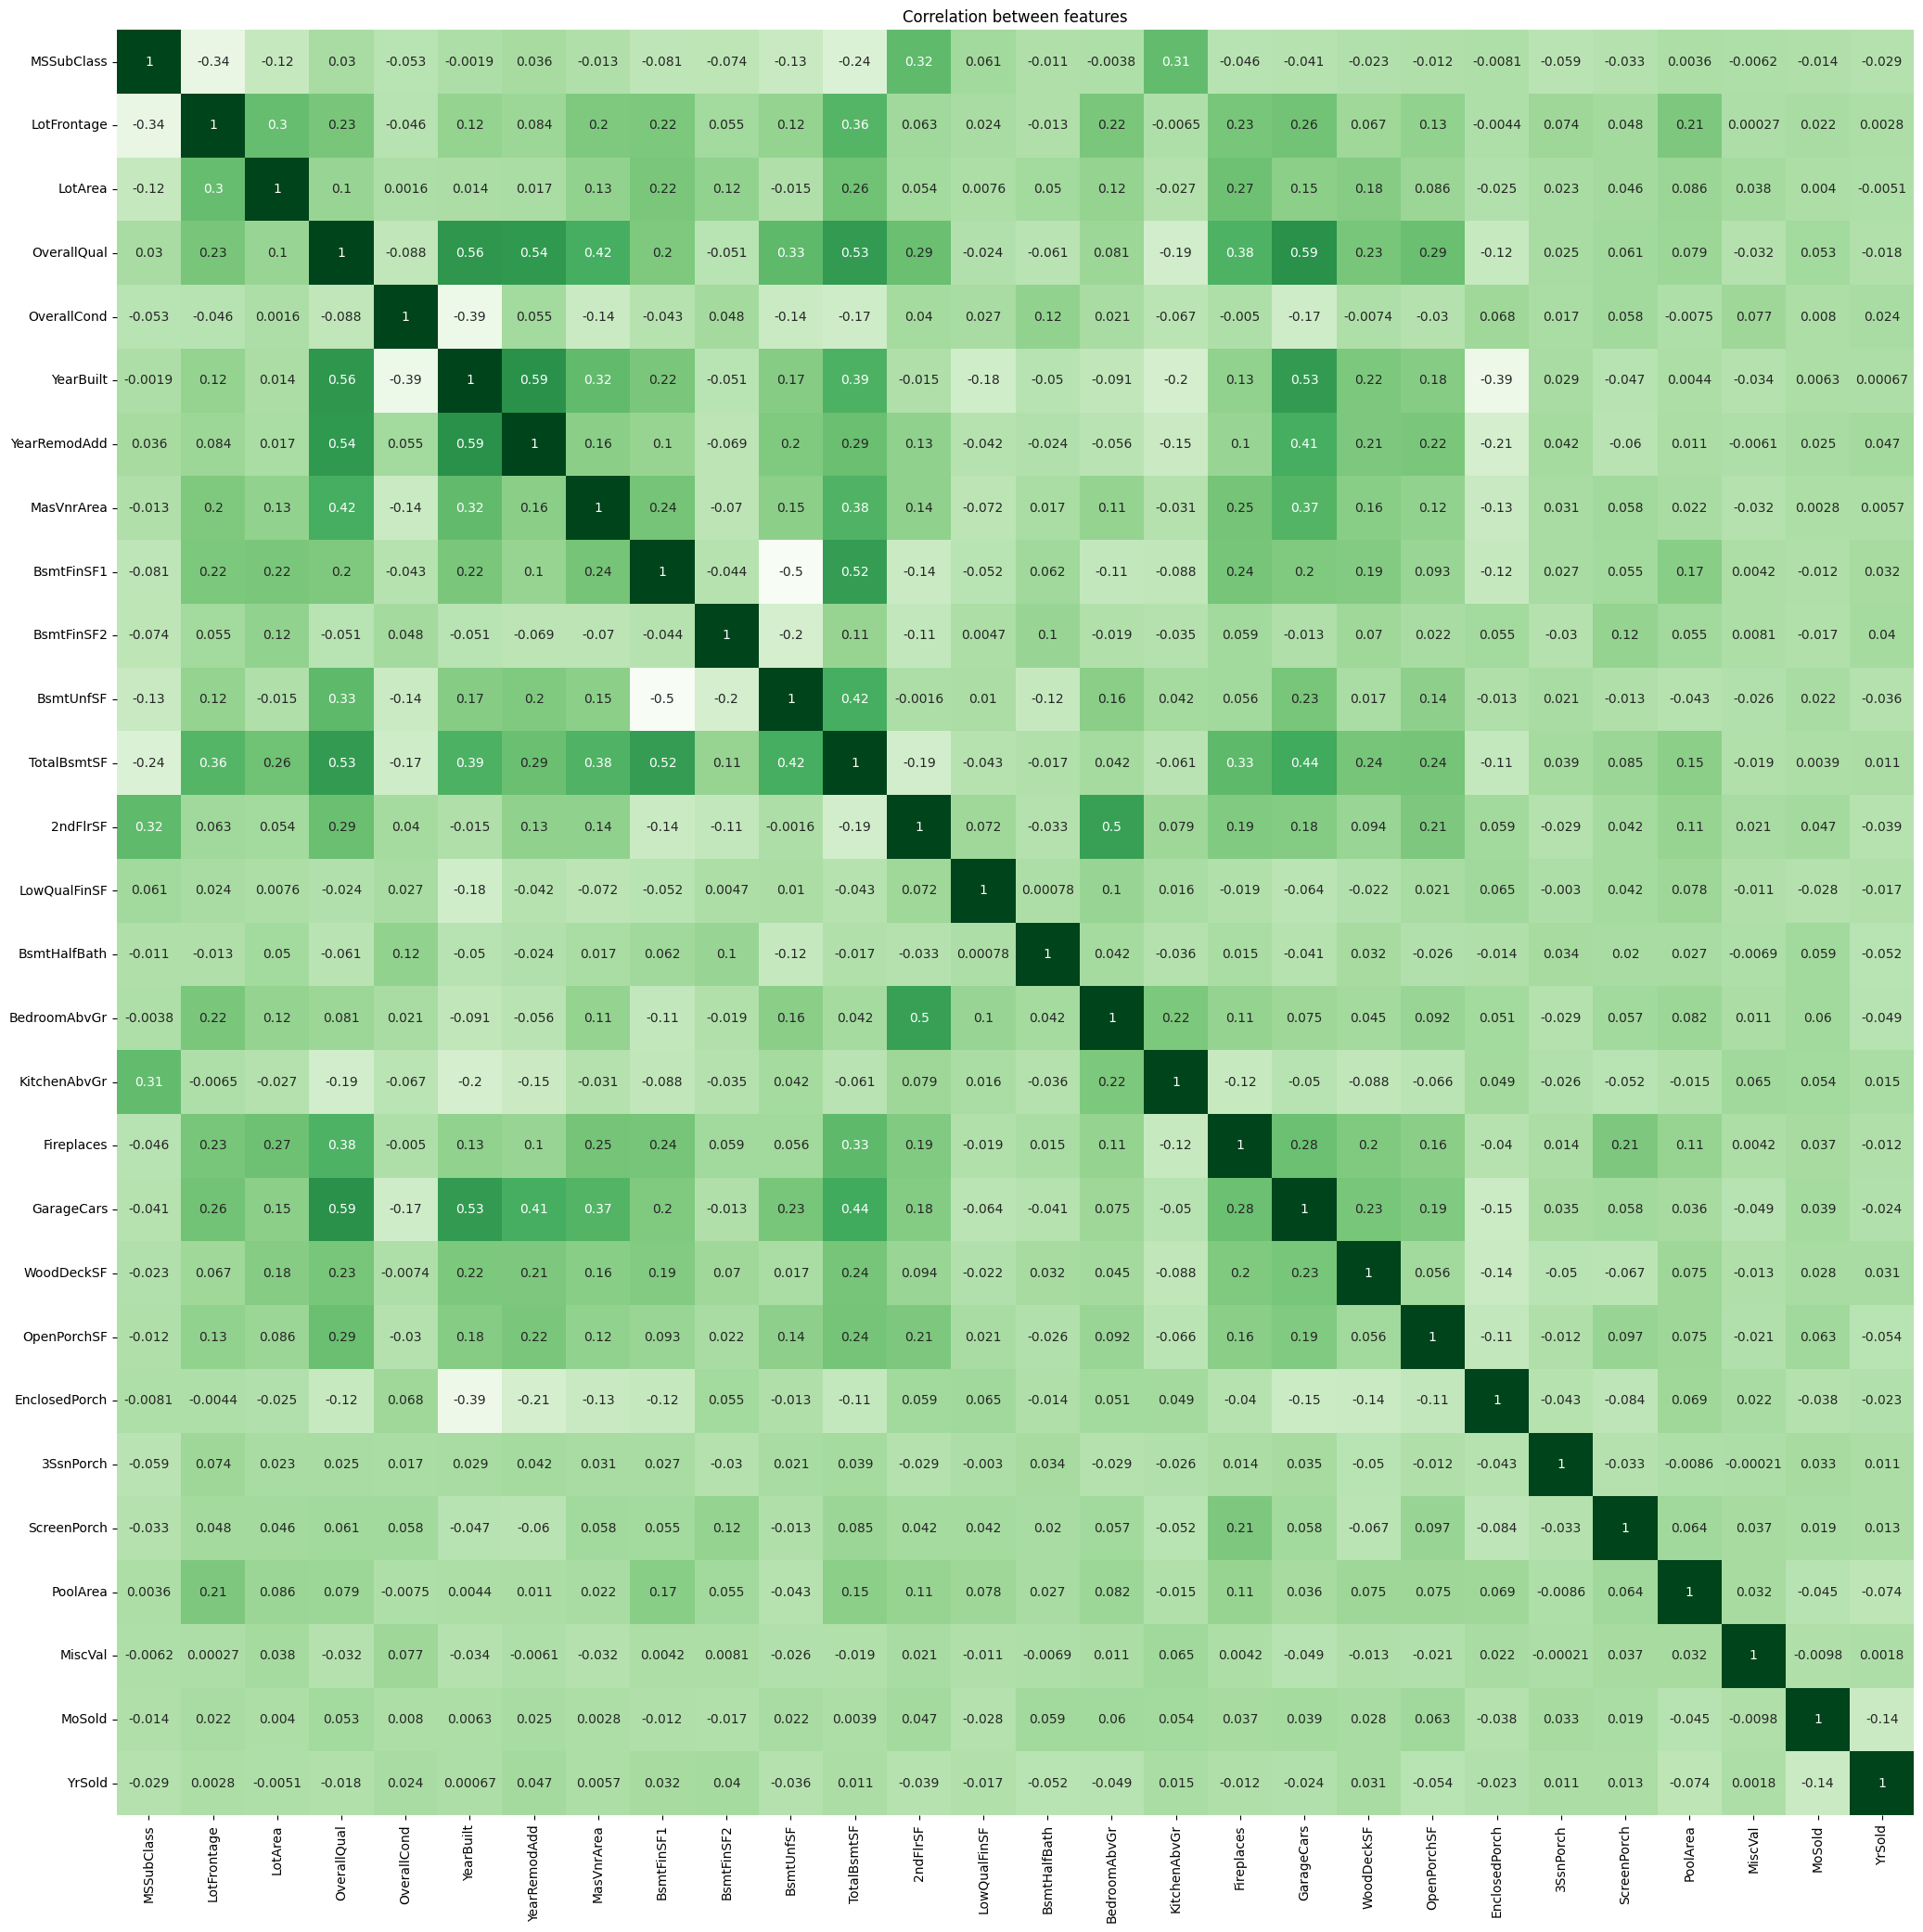

In [41]:
corr_new = X_train[num_data].corr()
plt.subplots(1,1, figsize=(25,25))
sns.heatmap(data=corr_new, cmap ='Greens', annot = corr_new, cbar=None)
plt.title('Correlation between features')
plt.show()

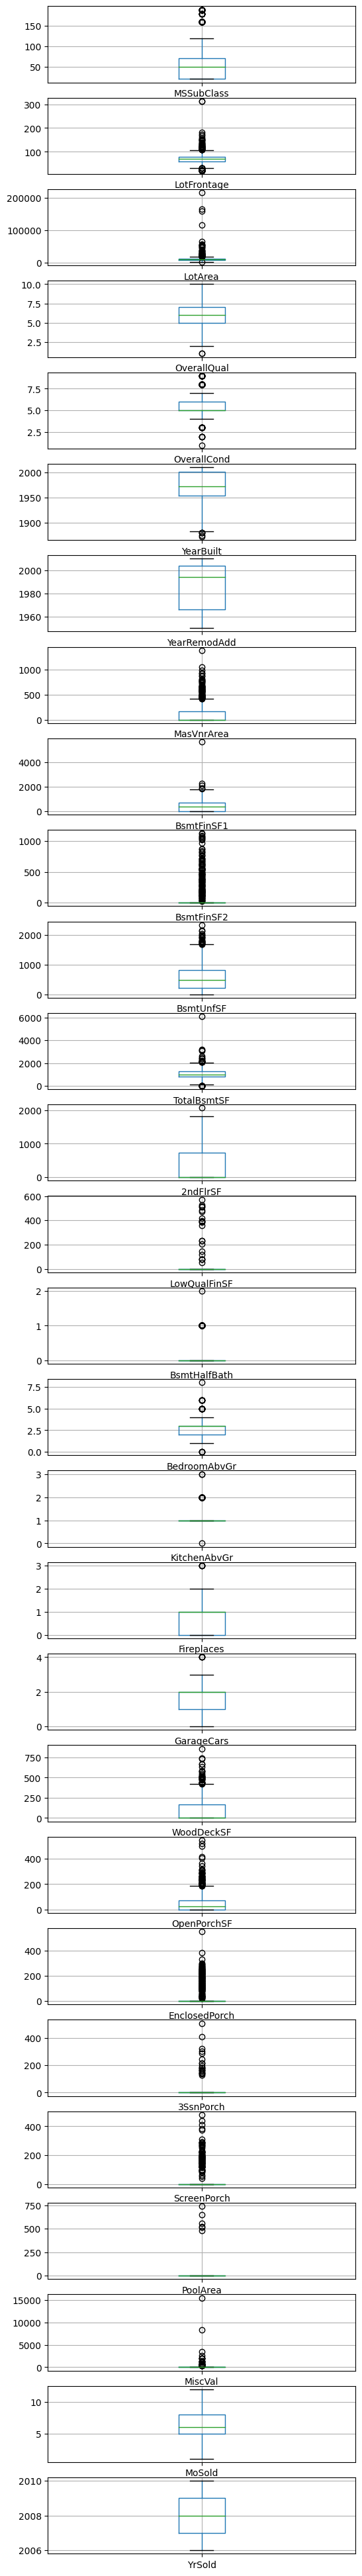

In [42]:
fig, ax = plt.subplots(len(num_data), 1, figsize=(6, 50))
for axs, feature in zip(ax, num_data):
    X_train[[feature]].boxplot(ax=axs)

In [43]:
y_train.value_counts()

SalePrice
140000    15
135000    13
110000    12
190000    12
155000    11
          ..
124900     1
229000     1
255900     1
136900     1
189950     1
Name: count, Length: 571, dtype: int64

In [44]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [45]:
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),MinMaxScaler())
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                         OneHotEncoder(handle_unknown='ignore'))
preprocessor = ColumnTransformer([
    ('num_pipe',num_pipe,num_data),
    ('cat_pipe',cat_pipe,cat_data)
])
preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath',
                                  'BedroomAbvGr', 'Kitchen...
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual',
                                  'Functional', ...])])

In [46]:
def prediction(model):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    return f"{model}'s RMSE is {np.sqrt(mean_squared_error(y_test, y_pred))}, MAE is {mean_absolute_error(y_test, y_pred)}, R2 is {r2_score(y_test, y_pred)}"

In [47]:
prediction(LinearRegression())

"LinearRegression()'s RMSE is 31462.802906193, MAE is 20216.47381476188, R2 is 0.8709431724316498"

In [48]:
prediction(DecisionTreeRegressor(random_state=42))

"DecisionTreeRegressor(random_state=42)'s RMSE is 40718.80873071596, MAE is 26907.359589041094, R2 is 0.7838395213367774"

In [49]:
prediction(RandomForestRegressor(n_estimators=100, random_state=42,n_jobs=-1))

"RandomForestRegressor(n_jobs=-1, random_state=42)'s RMSE is 30157.779335277482, MAE is 18979.59366438356, R2 is 0.8814272522616975"

In [50]:
prediction(GradientBoostingRegressor(random_state=42))

"GradientBoostingRegressor(random_state=42)'s RMSE is 29847.52307384875, MAE is 18518.951174759834, R2 is 0.8838544007673128"

In [51]:
prediction(RidgeCV())

"RidgeCV()'s RMSE is 34349.08866190868, MAE is 21452.92115373338, R2 is 0.8461786552443975"

In [52]:
prediction(ElasticNetCV())

"ElasticNetCV()'s RMSE is 84146.32466874932, MAE is 59133.0515535032, R2 is 0.07688359477801388"

In [53]:
prediction(LassoCV())

"LassoCV()'s RMSE is 32394.953792317425, MAE is 19965.25806787195, R2 is 0.8631827378836824"

In [54]:
best_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42)
prediction(best_model)

"GradientBoostingRegressor(max_depth=4, n_estimators=300, random_state=42)'s RMSE is 26288.182483554872, MAE is 16576.545397277547, R2 is 0.9099036312639288"

In [55]:
test_df = pd.read_csv("test.csv")
id = test_df['Id'].copy()
test_df = test_df.drop('Id', axis=1)
test_preprocessed = preprocessor.transform(test_df)
predictions = best_model.predict(test_preprocessed)
predictions_df = pd.DataFrame({
    'Id': id,
    'SalePrice': predictions
})
predictions_df.to_csv('predicted_prices_submission.csv', index=False)

print("Done，results saved into predicted_prices_submission.csv")


Done，results saved into predicted_prices_submission.csv


In [56]:
submission= pd.DataFrame(data = {'Id': range(1461,2920),
                                'SalePrice': predictions})
submission

,Id,SalePrice
0,1461,125748.951080
1,1462,153241.889063
2,1463,181958.301032
3,1464,190963.874761
4,1465,197136.405104
...,...,...
1454,2915,83354.141728
1455,2916,70072.199988
1456,2917,172423.309285
1457,2918,126694.684500


In [57]:
predictions_df.head()

,Id,SalePrice
0,1461,125748.951080
1,1462,153241.889063
2,1463,181958.301032
3,1464,190963.874761
4,1465,197136.405104


In [59]:
predictions_df.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,179101.621522
std,421.321334,74804.534305
min,1461.000000,43809.918749
25%,1825.500000,128532.925928
50%,2190.000000,159939.175498
75%,2554.500000,212506.229263
max,2919.000000,596585.883837
